##Tugas 4 Praktikum Machine Learning

###Nama : Hernan Sandi Laksono

###NIM  : 24060121130078

###Lab  : A1

##1. Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!

In [ ]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

mengimpor library yang digunakan dalam clustering.

In [ ]:
X1, y1 = make_blobs(n_samples=100,centers=[[4,4],[-2,-1],[1,1],[10,4]],cluster_std=0.9)

Untuk menghasilkan dataset acak, kita menggunakan fungsi make_blobs dengan mengatur n_samples sebanyak 100. Data ini akan dibagi secara merata di antara 4 kelompok dengan pusat kluster masing-masing berada di [[4,4], [-2,-1], [1,1], [10,4]]. Standar deviasi kluster (cluster_std) diatur sebesar 0.9, yang mempengaruhi jarak antar titik data dalam kluster tersebut.

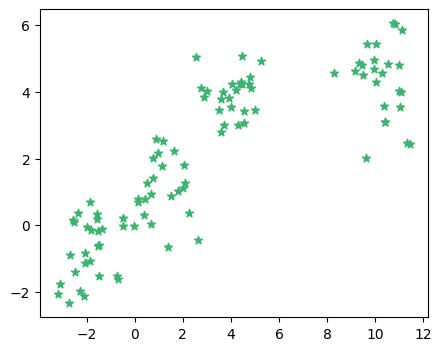

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X1[:, 0], X1[:, 1], marker='*', c='mediumseagreen')

Dalam kode dan hasilnya di atas, terlihat plot data dua dimensi yang dibuat secara acak. Titik-titik berwarna hijau tersebar secara acak tanpa adanya pola atau hubungan yang terlihat dengan jelas di antara nilai-nilainya. Kesimpulan yang dapat diambil adalah bahwa data ini tidak menunjukkan struktur yang terdefinisi dan sulit untuk dibagi menjadi kelompok-kelompok yang jelas. Beberapa karakteristik yang dapat diamati dari plot ini mencakup distribusi normal, variasi data yang dapat bervariasi, dan kemungkinan adanya asimetri dalam distribusi. Penggunaan data acak dua dimensi seperti ini umumnya dilakukan untuk menguji algoritma klasifikasi atau pengelompokan (clustering), serta untuk menciptakan data sintetis dalam konteks pelatihan model pembelajaran mesin.

In [ ]:
agglomsing = AgglomerativeClustering(n_clusters=4, linkage='single')
agglomsing.fit(X1, y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

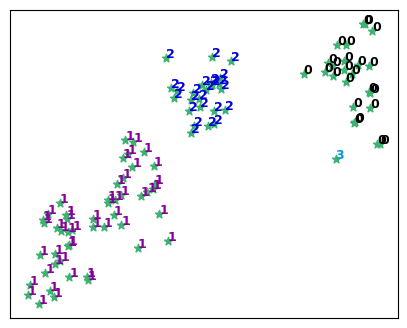

In [ ]:
plt.figure(figsize=(5,4))
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
  plt.text(X1[i, 0], X1[i, 1], str(agglomsing.labels_[i]),
           color=plt.cm.nipy_spectral(agglomsing.labels_[i] / 10.),
           fontdict={'weight': 'bold', 'size':9})

plt.xticks([])
plt.yticks([])
plt.scatter(X1[:, 0], X1[:, 1], marker='*', c='mediumseagreen')
plt.show()

In [ ]:
agglomavg = AgglomerativeClustering(n_clusters=4, linkage='average')
agglomavg.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

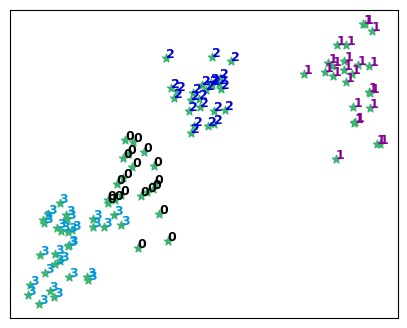

In [ ]:
plt.figure(figsize=(5,4))
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
  plt.text(X1[i, 0], X1[i, 1], str(agglomavg.labels_[i]),
           color=plt.cm.nipy_spectral(agglomavg.labels_[i] / 10.),
           fontdict={'weight': 'bold', 'size':9})

plt.xticks([])
plt.yticks([])
plt.scatter(X1[:, 0], X1[:, 1], marker='*', c='mediumseagreen')
plt.show()

In [ ]:
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)

[[0.         0.73745361 0.45061942 ... 0.06532294 1.01393813 0.40401564]
 [0.73745361 0.         0.43248164 ... 0.79537846 0.29050898 0.42287561]
 [0.45061942 0.43248164 0.         ... 0.48538939 0.71845824 0.0598482 ]
 ...
 [0.06532294 0.79537846 0.48538939 ... 0.         1.07446659 0.44364515]
 [1.01393813 0.29050898 0.71845824 ... 1.07446659 0.         0.71268281]
 [0.40401564 0.42287561 0.0598482  ... 0.44364515 0.71268281 0.        ]]


In [ ]:
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-9-7e9a5415d43d>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-9-7e9a5415d43d>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


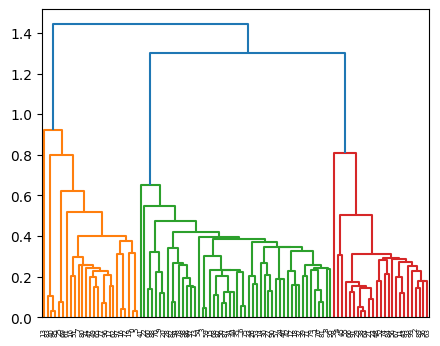

In [ ]:
plt.figure(figsize=(5,4))
dendro = hierarchy.dendrogram(X)

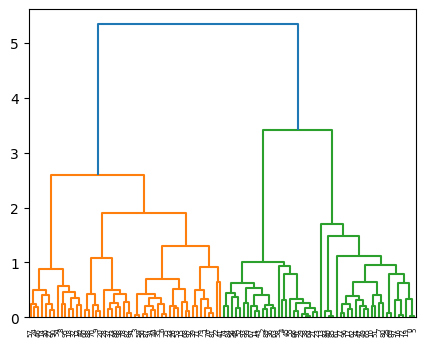

In [ ]:
plt.figure(figsize=(5,4))
dendro2 = hierarchy.dendrogram(Y)

Analisis agglomerative clustering mengungkapkan perbedaan yang signifikan antara dua metode linkage, yaitu single linkage dan average linkage.

Dalam single linkage, sebagian besar data tergabung dalam cluster 1, sedangkan cluster 2 hanya memiliki satu titik data. Cluster 0 dan 3 menunjukkan sebaran yang hampir merata. Struktur kluster pada single linkage dapat dilihat dari posisi relatif mereka dalam plot.

Sementara itu, average linkage menunjukkan distribusi data yang lebih merata dibandingkan dengan single linkage. Cluster 1 tetap berada di sebelah kiri, diikuti oleh cluster 3, kemudian cluster 0, dan paling kanan adalah cluster 2.
Dengan menggunakan dendrogram dan nilai cut-off point sebesar 0.7, single linkage menghasilkan 3 cluster dengan distribusi data yang tidak merata. Sebaliknya, average linkage menghasilkan 15 cluster, menunjukkan tingkat kompleksitas struktur kluster yang lebih tinggi.

Dengan menggunakan nilai cut-off point sebesar 2, average linkage menghasilkan 4 cluster dengan sebaran data yang hampir merata.

Perbedaan dalam jumlah cluster ini dipengaruhi oleh metode linkage yang digunakan; single linkage mengukur berdasarkan jarak terdekat, sementara average linkage menghitung dari rata-rata. Kesimpulan ini menyoroti pentingnya pemilihan metode linkage dalam analisis klastering untuk memahami struktur dan distribusi data secara lebih baik.

##2. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pdf = pd.read_csv('/content/drive/My Drive/cars_clus.csv')
print ("Shape of dataset: ", pdf.shape)
pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


Memuat dataset bernama cars_clus yang berisi berbagai atribut mobil seperti harga, ukuran mesin, horsepower, jarak sumbu roda, lebar, panjang, berat trotoar, kapasitas bahan bakar, dan efisiensi bahan bakar. Dalam rangka memberikan gambaran awal tentang data ini, dataset dimuat dan ditampilkan lima baris pertamanya menggunakan fungsi print dan head. Langkah ini penting untuk menjelajahi variasi dan karakteristik utama dari dataset mobil, memberikan pemahaman awal sebelum melakukan analisis lebih lanjut. Tahapan eksplorasi data seperti ini merupakan langkah awal yang krusial dalam memahami sifat data, yang membantu dalam pengambilan keputusan dan mempersiapkan dasar untuk analisis mendalam.

In [ ]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
      'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
      'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
      'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
      'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [ ]:
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

Pada kode di atas, dilakukan tahap seleksi fitur di mana fitur-fitur yang dianggap penting untuk proses clustering dipilih. Dalam proses ini, perintah khusus digunakan untuk mengidentifikasi dan mengonversi fitur-fitur tertentu ke dalam format numerik. Langkah ini bertujuan untuk meningkatkan kualitas klastering dan mengoptimalkan kontribusi dari fitur-fitur yang dianggap signifikan. Seleksi fitur menjadi langkah kritis dalam mencegah overfitting dan meningkatkan efisiensi analisis klastering. Implementasi perintah yang sesuai memberikan informasi yang diperlukan untuk menentukan fitur-fitur yang memiliki dampak tertinggi dalam konteks analisis klastering.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Dalam langkah ini, dilakukan normalisasi fitur dengan menggunakan MinMaxScaler untuk mengubah rentang nilai setiap fitur menjadi antara 0 hingga 1. Normalisasi ini dilakukan melalui perintah khusus, memastikan bahwa nilai setiap fitur memiliki skala yang seragam.

Normalisasi fitur memiliki signifikansi penting dalam analisis data, terutama dalam konteks metode klastering. Prosedur ini membantu mengatasi potensi bias yang dapat muncul dari variasi rentang nilai antar fitur, sehingga memastikan bahwa setiap fitur memberikan kontribusi yang seimbang dalam proses pembentukan kluster. Dengan menggunakan MinMaxScaler, kita dapat memastikan bahwa skala yang seragam diterapkan pada setiap fitur, sehingga memudahkan interpretasi dan analisis klastering yang lebih baik.

###Clustering menggunakan scipy

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

<ipython-input-18-9d347fa56be6>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


Dengan memanfaatkan library Scipy, kita dapat mengukur jarak antara kluster baru dan setiap kluster lainnya menggunakan berbagai metode seperti single, complete, average, weighted, dan centroid. Proses ini diimplementasikan melalui perintah berikut, di mana parameter D menunjukkan penggunaan metrik Euclidean untuk mengukur jarak antar kluster.

Penjelasan ini menggambarkan bahwa kita dapat menghitung jarak antar kluster dengan memanfaatkan metode-metode tersebut dalam konteks analisis klastering menggunakan Scipy.

In [ ]:
import pylab
import scipy.cluster.hierarchy
X = hierarchy.linkage(D, 'single')
Y = hierarchy.linkage(D, 'average')

<ipython-input-19-171a966a9f44>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')
<ipython-input-19-171a966a9f44>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')


Dalam kode tersebut, kita menginisialisasi single linkage dan average linkage dengan menyimpannya masing-masing dalam variabel X dan Y. Implementasi ini dapat dilihat pada perintah berikut.

Selanjutnya, untuk menjalankan hierarchical clustering, kita menetapkan nilai batas maksimum untuk jarak antar kluster (max_d) awalnya sebesar 3. Kami juga melakukan eksperimen dengan menginisialisasi jumlah kluster (k) sebanyak 5. Dalam setiap hierarki linkage, inisialisasi dengan max_d = 3 dan k = 5 diimplementasikan, menghasilkan hasil untuk setiap jenis linkage.

Langkah ini memberikan gambaran tentang bagaimana pengelompokan berubah dengan memodifikasi nilai batas maksimum untuk jarak antar kluster dan jumlah kluster yang diinisialisasi. Dengan mencoba berbagai konfigurasi, kita dapat memahami lebih baik tentang struktur kluster optimal dalam konteks analisis data.

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(X, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(X, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Y, max_d, criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Y, k, criterion='maxclust')
clusters

array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

Kemudian, dilakukan pembuatan dendrogram untuk memvisualisasikan agglomerative
clustering menggunakan Scipy pada masing-masing jenis linkage. Pada visualisasi ini,
kolom 'manufact' digunakan sebagai sumbu Y, sehingga nama-nama manufaktur akan
ditampilkan sebagai klasterisasi pada dendrogram

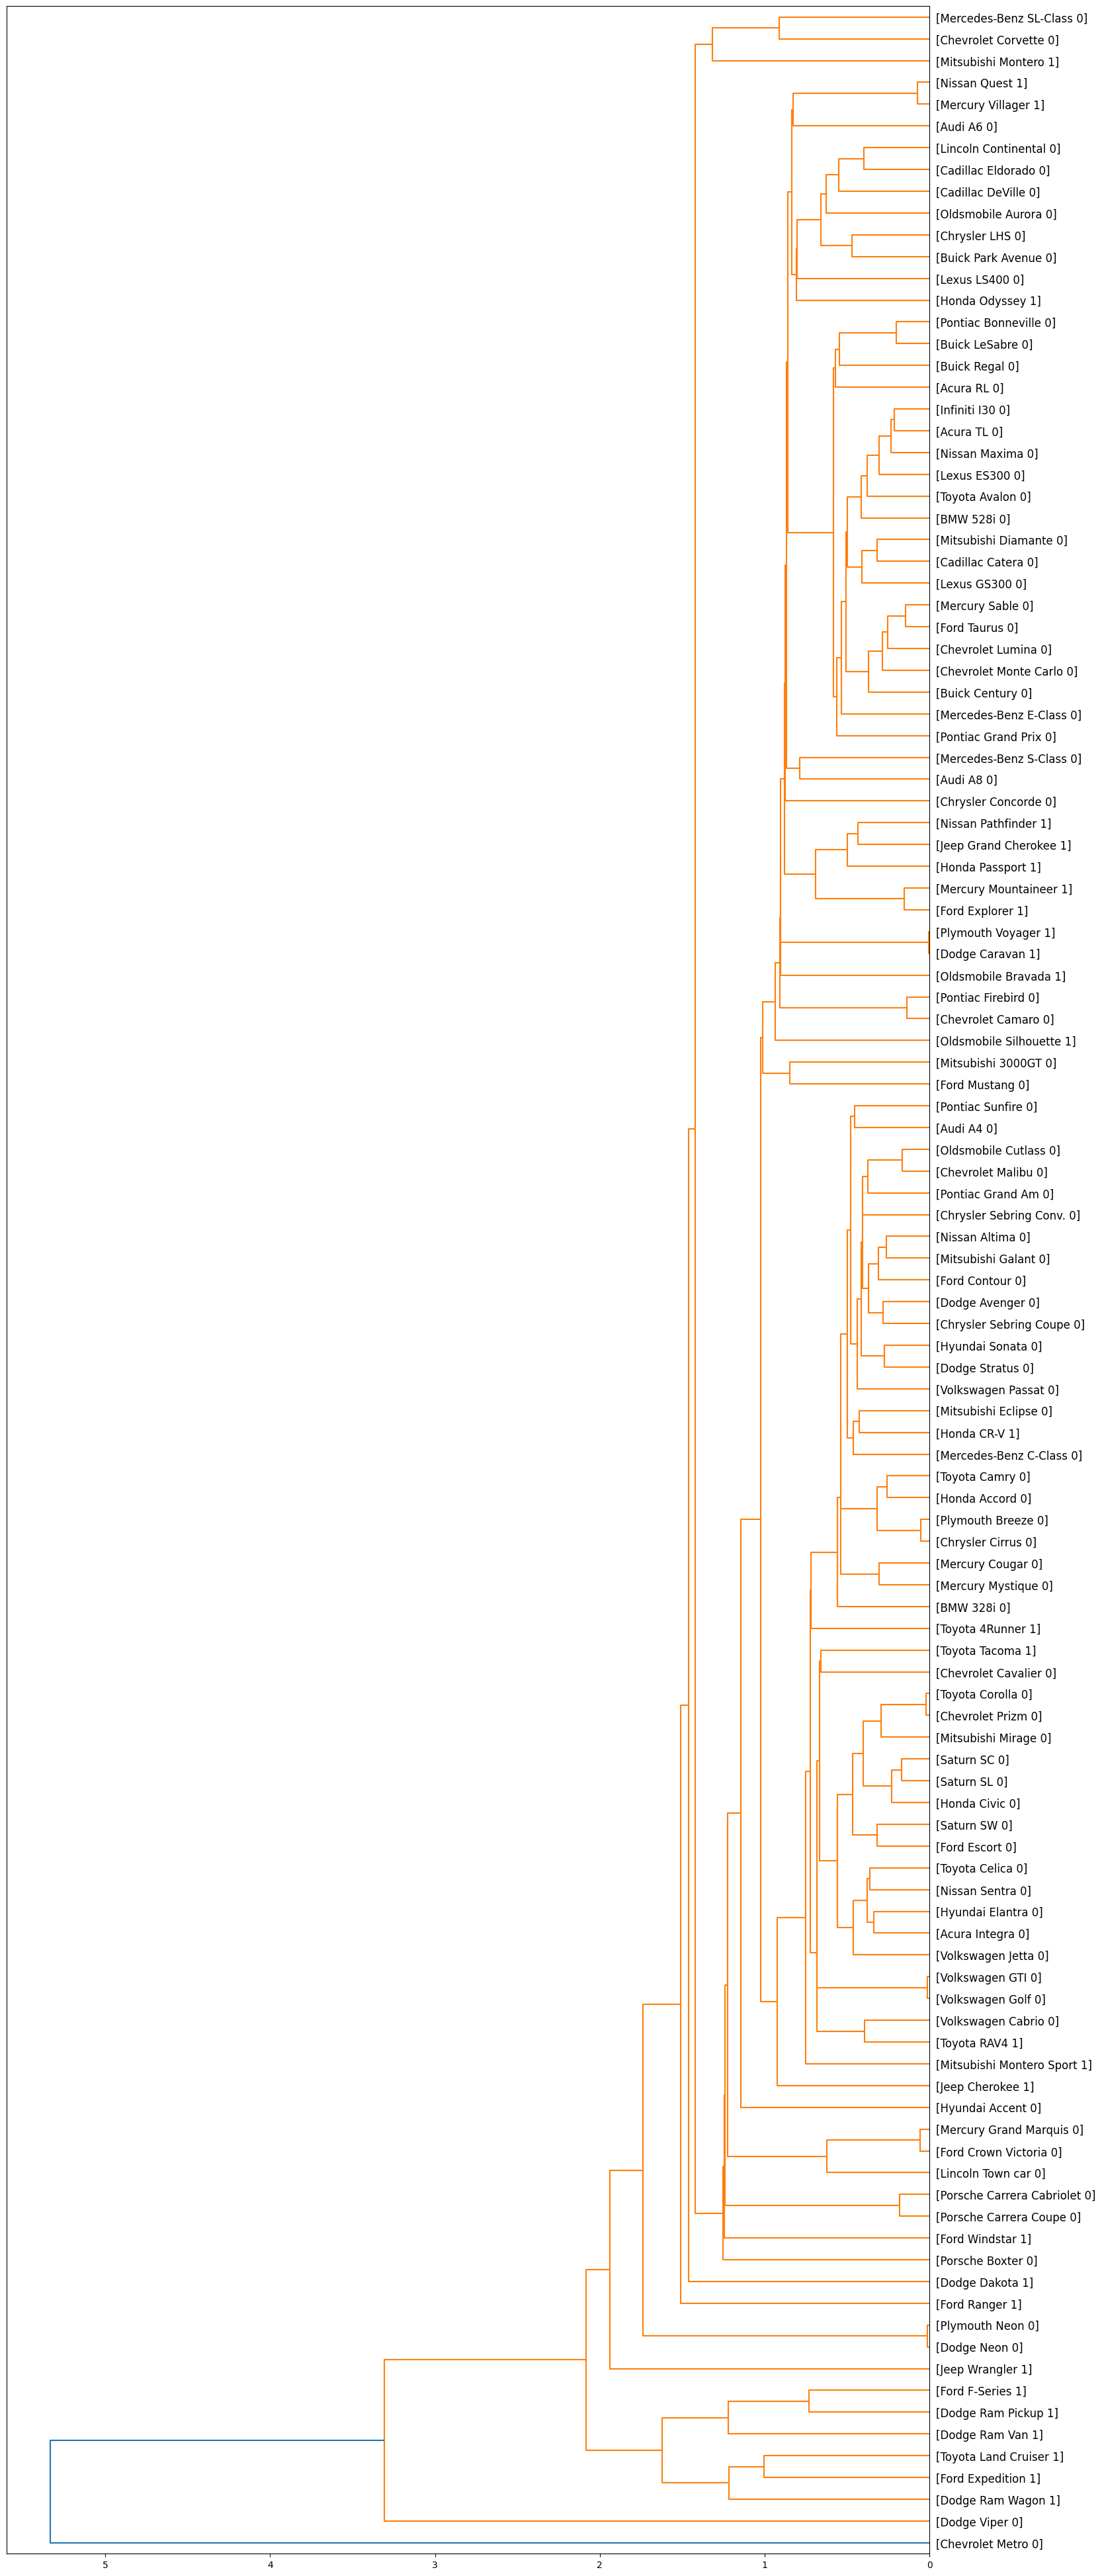

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' %(pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))

dendro = hierarchy.dendrogram(X, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation = 'left')

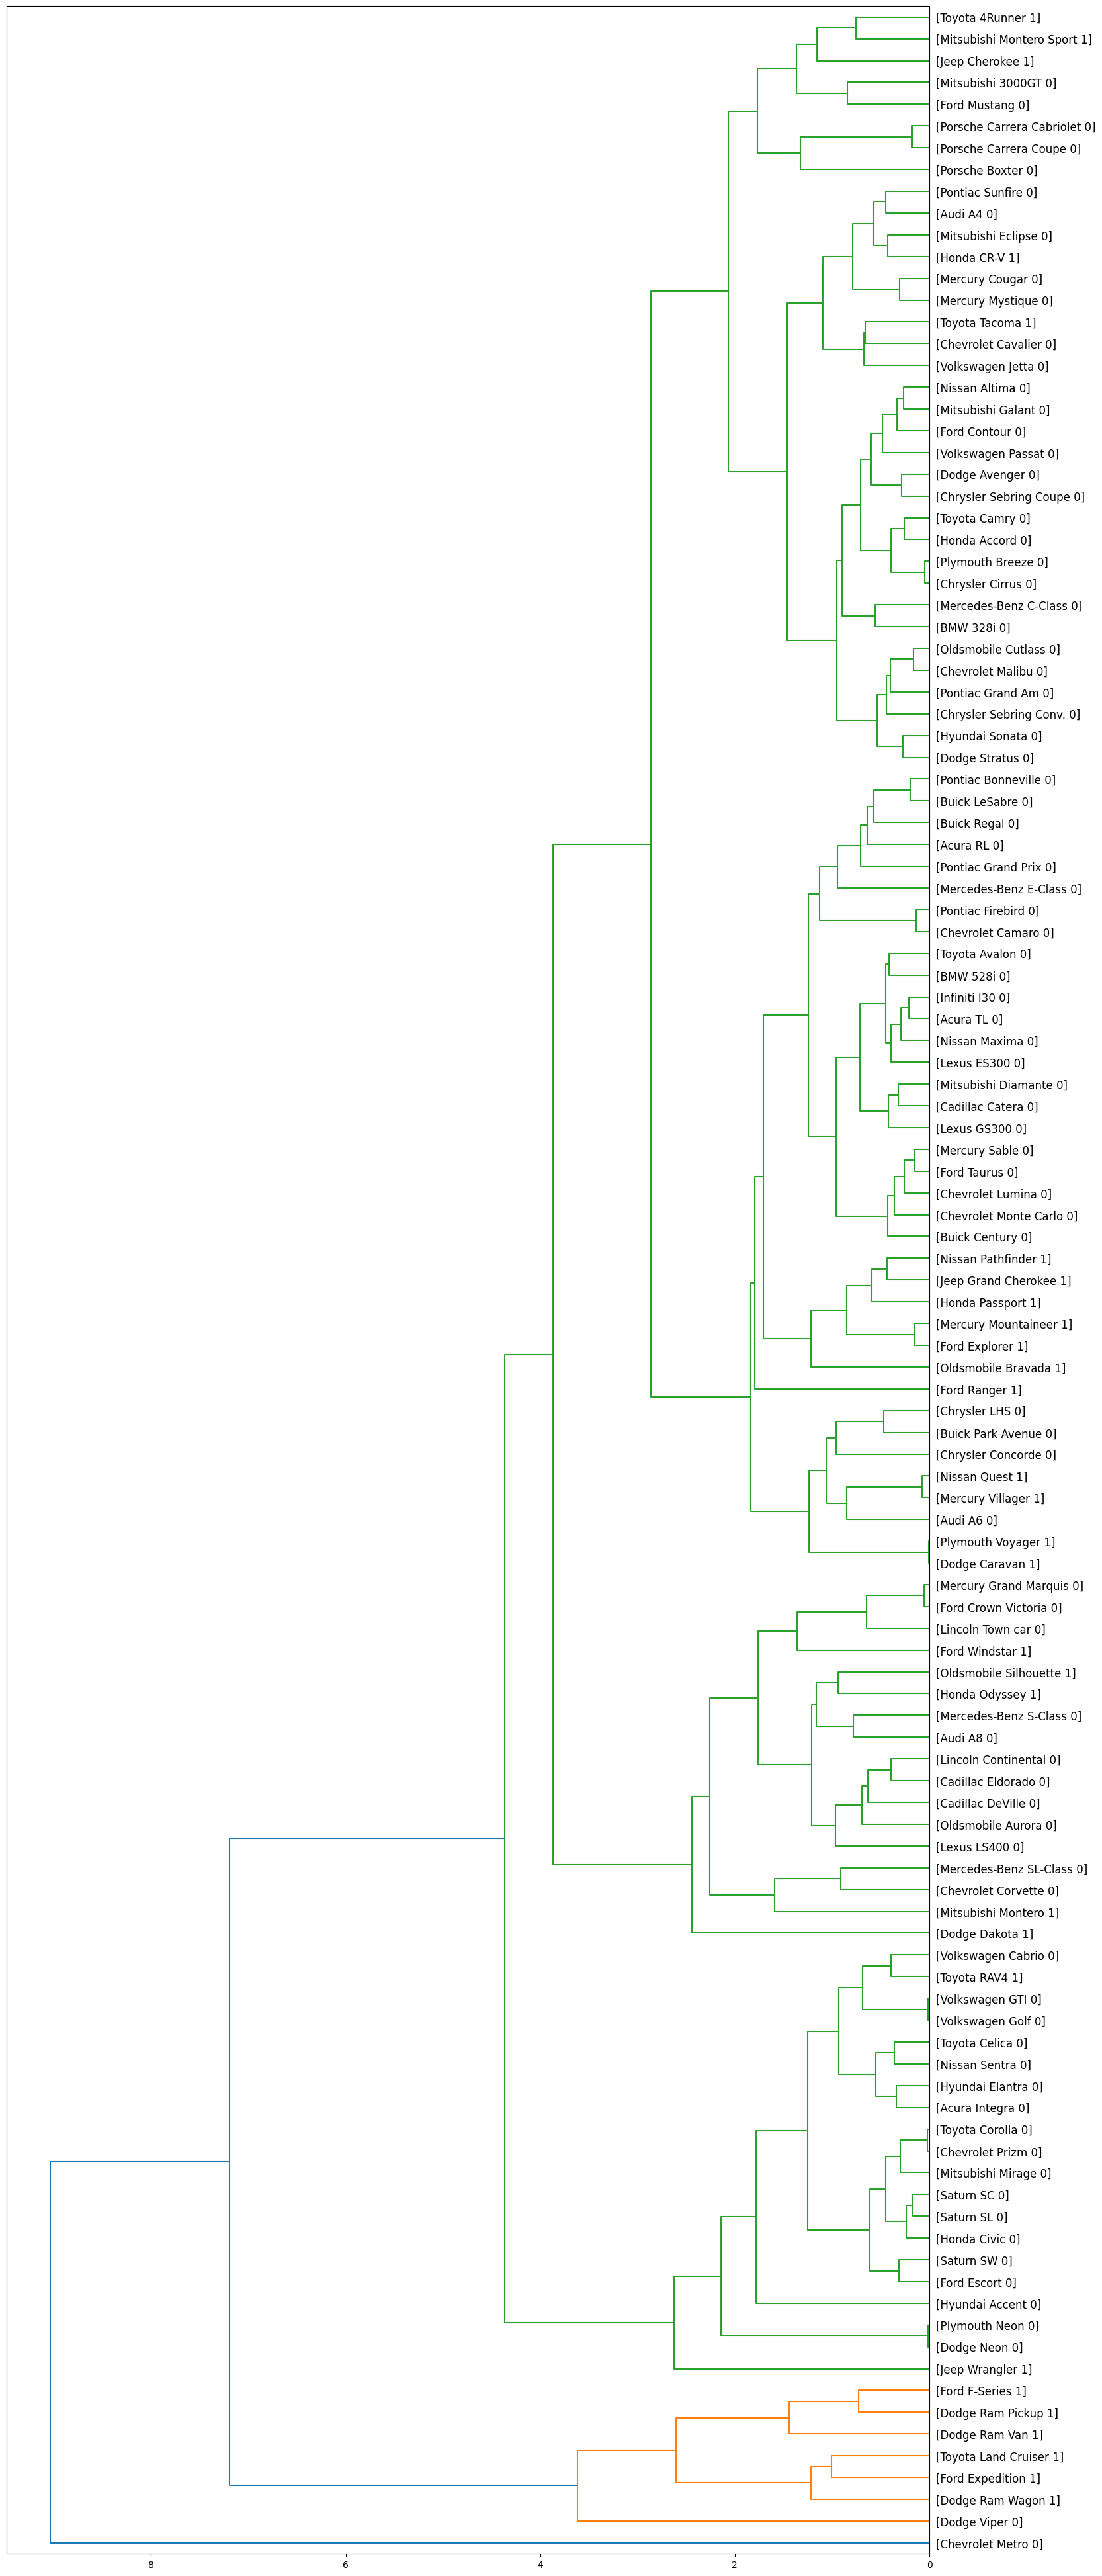

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' %(pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))

dendro = hierarchy.dendrogram(Y, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation = 'left')

###Agglomerative Clustering dengan Scikit-Learn

In [ ]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx )
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [ ]:
agglomsing = AgglomerativeClustering(n_clusters = 6, linkage = 'single').fit(feature_mtx)
agglomavg = AgglomerativeClustering(n_clusters = 6, linkage = 'average').fit(feature_mtx)

agglomsing.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

Dalam langkah ini, digunakan fungsi 'AgglomerativeClustering' dari library Scikit-Learn untuk melakukan pengelompokan dataset dengan pendekatan bottom-up. Proses dimulai dengan menghitung jarak antar titik menggunakan fungsi dist_matrix. Selanjutnya, dilakukan inisialisasi metode linkage menggunakan variabel agglomcom, agglomsing, dan agglomavg untuk complete, single, dan average linkage, dengan menetapkan jumlah kluster sebanyak 6.

Penjelasan ini menyampaikan bahwa kode tersebut melibatkan proses pengelompokan menggunakan pendekatan aglomerasi dari bawah ke atas, dan tiga jenis linkage yang berbeda, yaitu complete, single, dan average, digunakan untuk membentuk kluster. Jumlah kluster diatur sebanyak 6 dalam proses ini.

In [ ]:
sing = pdf.copy(deep=True)
avg = pdf.copy(deep=True)

In [ ]:
sing['cluster_'] = agglomsing.labels_
avg['cluster_'] = agglomavg.labels_

Selanjutnya, untuk memvisualisasikan kluster dari setiap baris, kita menambahkan kolom baru ke dalam dua dataframe baru, yaitu 'sing' dan 'avg', menggunakan perintah berikut. Setelahnya, kita menampilkan lima baris teratas dari kedua dataframe tersebut untuk masing-masing metode linkage:

Sebagai langkah awal dalam visualisasi, kita menggunakan scatter plot dengan hasil sebagai berikut. Meskipun pada visualisasi ini, masih terdapat keterbatasan dalam kejelasan lokasi pusat-pusat kluster.

Penjelasan tersebut menjelaskan bahwa kode tersebut menambahkan kolom kluster ke dua dataframe baru, 'sing' dan 'avg', untuk merepresentasikan kluster dari setiap baris. Visualisasi awal dilakukan dengan scatter plot untuk memperlihatkan distribusi data dalam kluster, meskipun mungkin masih terdapat keterbatasan dalam kejelasan lokasi pusat-pusat kluster pada tahap ini.

In [ ]:
sing.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


In [ ]:
avg.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,4


<ipython-input-32-a727c4bb9c34>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

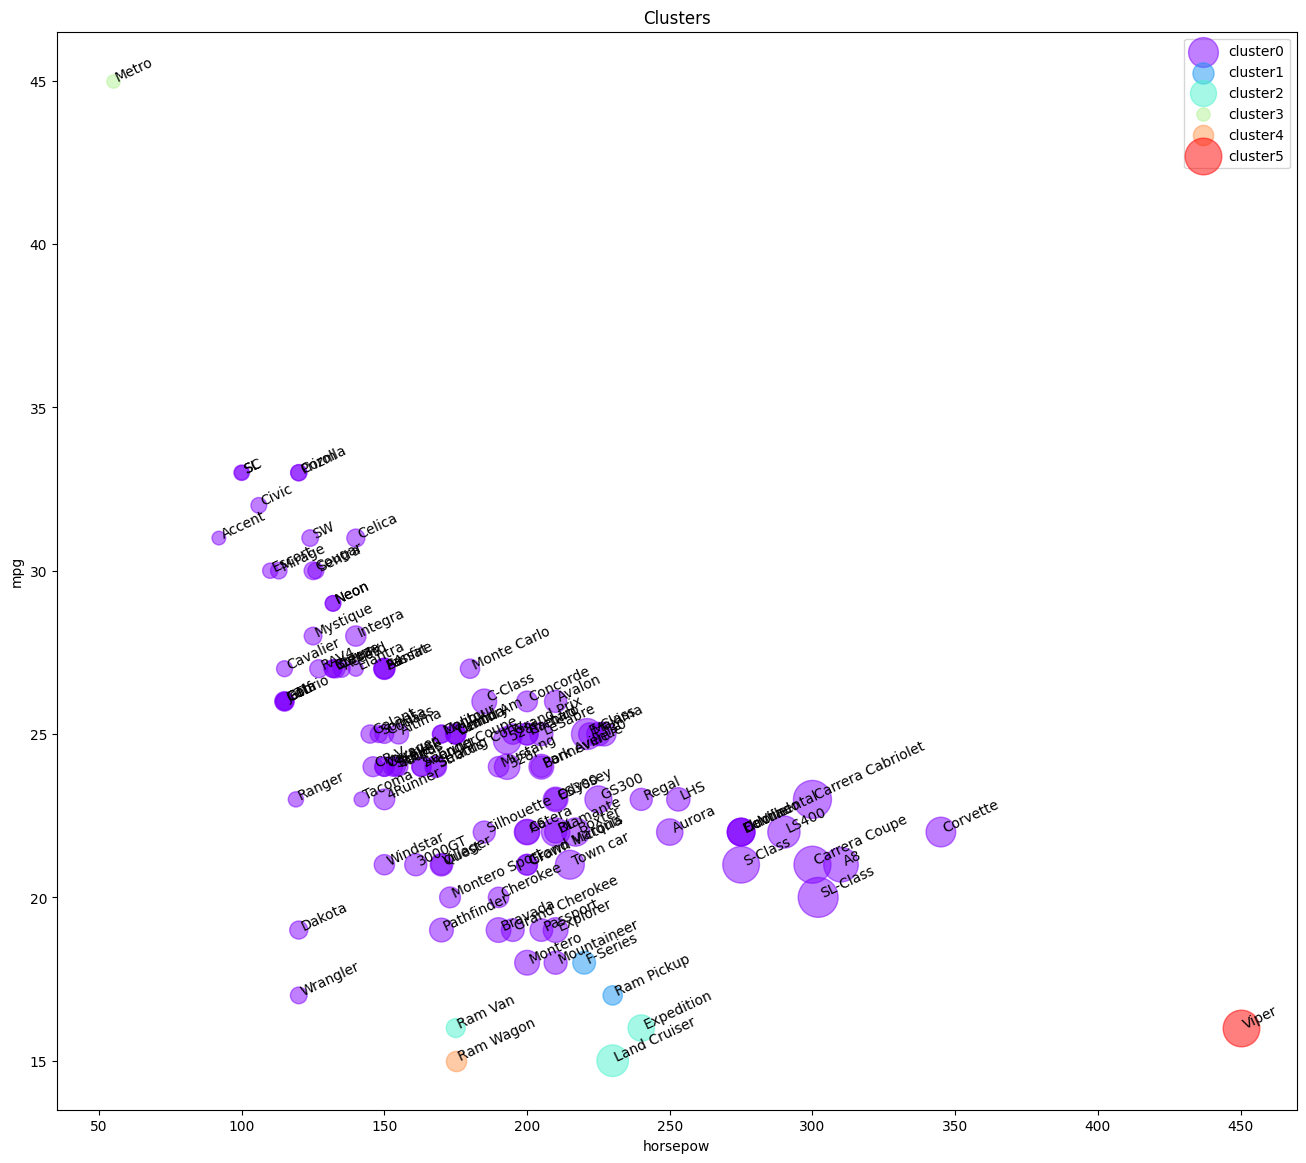

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglomsing.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
  subset = sing[sing.cluster_ == label]
  for i in subset.index:
      plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
# plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

<ipython-input-33-c4841b2fc918>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

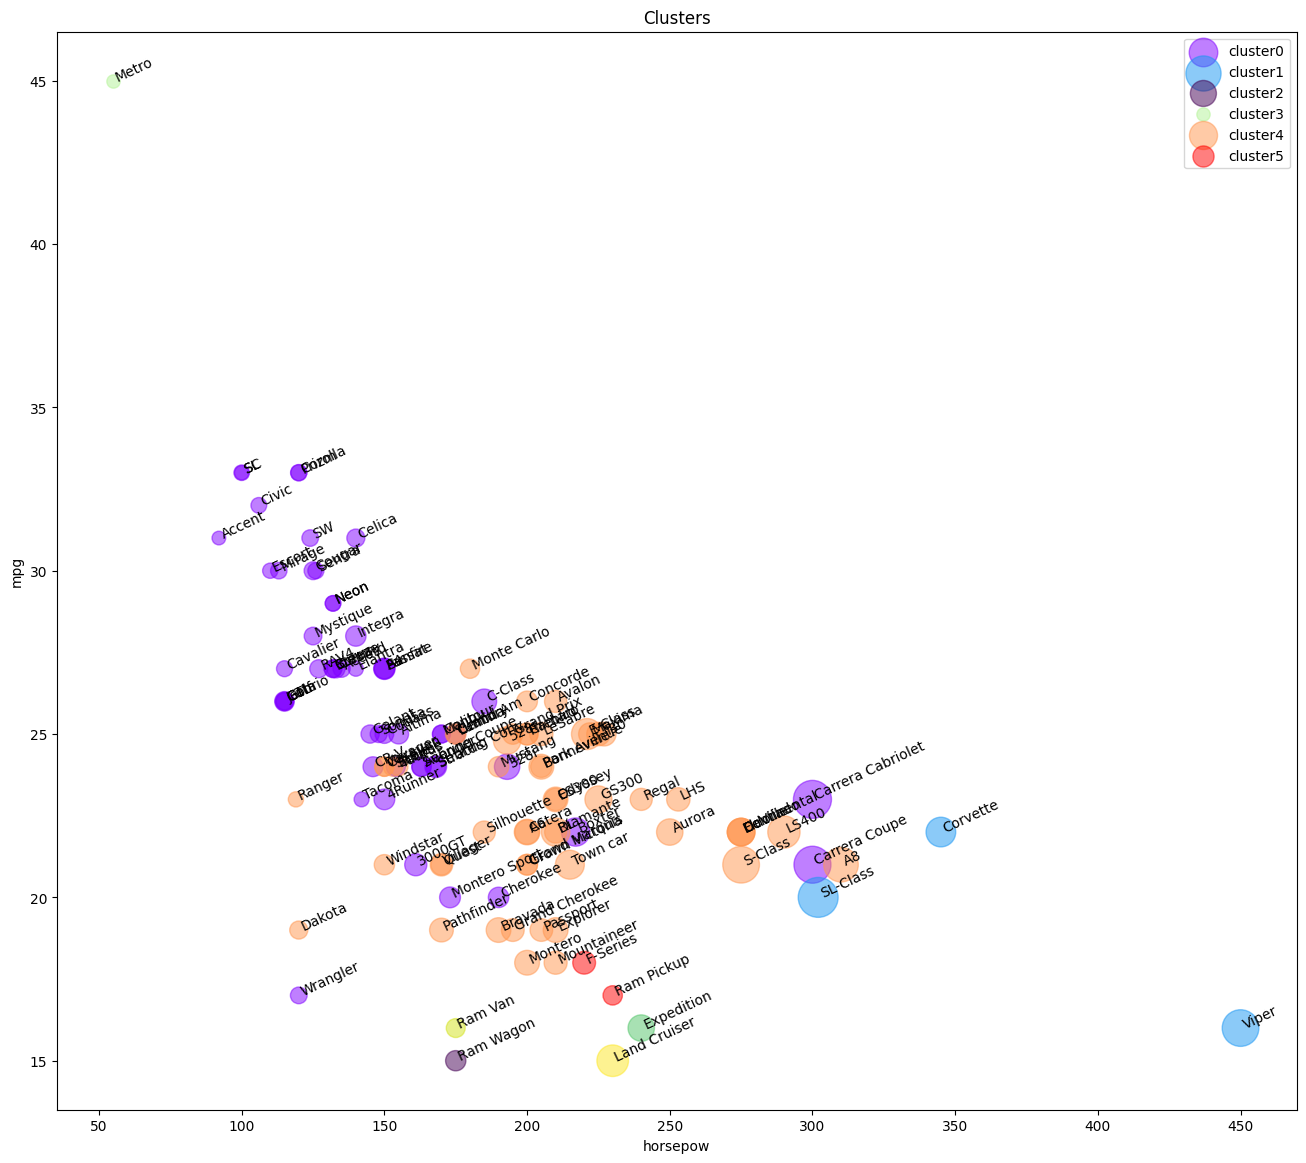

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglomavg.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
  subset = avg[avg.cluster_ == label]
  for i in subset.index:
      plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
# plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [ ]:
sing.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [ ]:
avg.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

In [ ]:
sing_cars = sing.groupby(['cluster_','type'])['horsepow', 'engine_s','mpg', 'price' ].mean()
sing_cars

<ipython-input-36-2a3c51fead3e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sing_cars = sing.groupby(['cluster_','type'])['horsepow', 'engine_s','mpg', 'price' ].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

In [ ]:
avg_cars = avg.groupby(['cluster_','type'])['horsepow', 'engine_s','mpg', 'price' ].mean()
avg_cars

<ipython-input-37-71c3f6666010>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_cars = avg.groupby(['cluster_','type'])['horsepow', 'engine_s','mpg', 'price' ].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

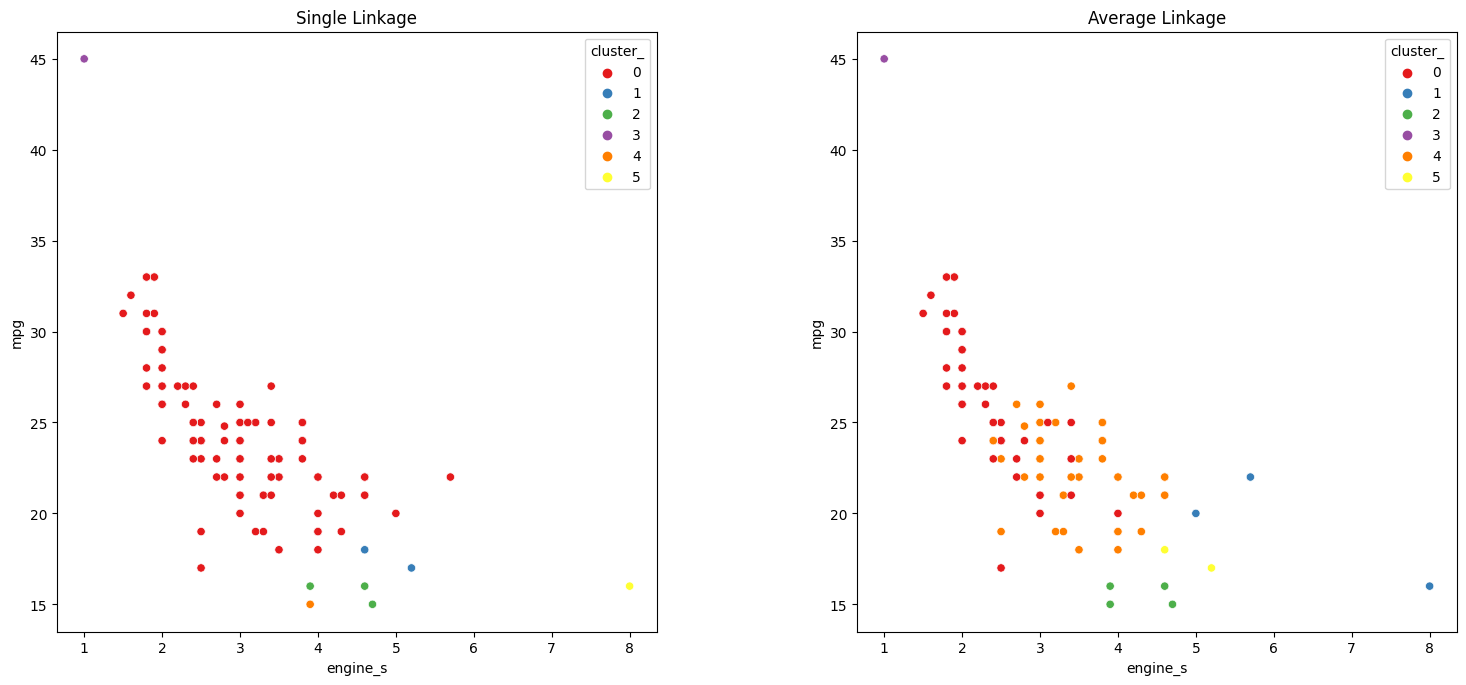

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(20,10))

# Single Linkage Dendogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='engine_s',y='mpg',hue='cluster_',data=sing,palette='Set1')
ax2.set_title('Single Linkage')

# Average Linkage Dendogram
ax3 = fig.add_axes([0.9,0.1,0.3,0.6])
sns.scatterplot(x='engine_s',y='mpg',hue='cluster_',data=avg,palette='Set1')
ax3.set_title('Average Linkage')

plt.show()

Perbedaan:
Dengan menggunakan Scipy dan Scikit-Learn, hasil dari proses klastering cenderung serupa, meskipun terdapat perbedaan dalam langkah-langkah yang terlibat. Terutama, Scikit-Learn memerlukan lebih banyak proses karena harus menghitung jarak, jumlah kasus, dan karakteristik dari setiap kluster untuk menghasilkan dendrogram atau visualisasi akhir yang lebih jelas.

Karakteristik dari setiap kluster, baik yang dihasilkan melalui single linkage maupun average linkage, menunjukkan variasi dalam jumlah data di setiap kluster. Pada klastering dengan single linkage, sebagian besar data tergabung dalam kluster 0, dan kluster lainnya memiliki jumlah data yang terbatas, sesuai dengan ilustrasi di atas. Di sisi lain, pada klastering dengan average linkage, data lebih tersebar, di mana data yang sebelumnya termasuk dalam kluster 0 pada single linkage, sekarang terbagi antara kluster 0 dan 4.

Sebagai hasilnya, persebaran data di setiap kluster menjadi lebih merata dibandingkan dengan single linkage, di mana mayoritas data terdapat dalam kluster 0. Sementara itu, pada klastering dengan complete linkage, mayoritas data tergabung dalam kluster 1 dan 2. Pada complete linkage, data ini terbagi menjadi kluster 1 dan 2, dengan sebagian kecil di kluster 3, dan data yang berada di bawah menjadi kluster 0, 4, dan 5.

##3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset iris! Jelaskan perbedaannya!

In [ ]:
from sklearn.datasets import load_iris
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print ("Shape of dataset: ", df.shape)
df.head(5)

Shape of dataset:  (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Dataset yang dianalisis dalam konteks ini adalah Iris, yang mencakup berbagai fitur penting seperti panjang sepal, lebar sepal, panjang petal, dan lebar petal. Semua pengukuran dilakukan dalam satuan sentimeter. Untuk memberikan gambaran awal yang representatif, dipilihlah lima entri pertama dari dataset. Tahap ini diimplementasikan dengan menggunakan perintah khusus, dan hasilnya ditampilkan untuk memberikan pemahaman awal terhadap struktur dataset yang akan digunakan dalam analisis ini.

In [ ]:
# Normalize dataset
x = df.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

Dataset ini memiliki kelebihan karena tidak mengandung nilai null dan memiliki jumlah fitur yang relatif sedikit. Oleh karena itu, dataset ini sangat cocok untuk dilakukan proses clustering. Tahap selanjutnya langsung melibatkan normalisasi, di mana setiap fitur diubah skala menggunakan MinMaxScaler untuk memastikan bahwa nilai-nilai tersebut berada dalam rentang (0,1). Berikut adalah perintah dan hasil dari proses normalisasi.

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

<ipython-input-41-9d347fa56be6>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


Dengan menggunakan Scipy, kita dapat mengukur jarak antara kluster yang baru terbentuk dan setiap kluster lainnya menggunakan metode seperti single linkage, complete linkage, average linkage, weighted linkage, dan centroid linkage. Perintah berikut menghitung jarak dengan metode Euclidean, di mana D adalah fungsi yang mengukur jarak antar kluster.

In [ ]:
import pylab
import scipy.cluster.hierarchy
sing = hierarchy.linkage(D, 'single')
avg = hierarchy.linkage(D, 'average')
com = hierarchy.linkage(D, 'complete')

<ipython-input-42-1139a7ef4c1e>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  sing = hierarchy.linkage(D, 'single')
<ipython-input-42-1139a7ef4c1e>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  avg = hierarchy.linkage(D, 'average')
<ipython-input-42-1139a7ef4c1e>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  com = hierarchy.linkage(D, 'complete')


Selanjutnya, untuk menerapkan tiga tingkat hierarki linkage, kita menginisialisasi variabel sing untuk single linkage, avg untuk average linkage, dan com untuk complete linkage. Inisialisasi ini dilakukan melalui perintah di atas.

Dalam pelaksanaan hierarchical clustering, kita menggunakan nilai batas maksimum untuk jarak antar kluster (max_d) dengan menginisialisasi nilainya menjadi 3. Eksplorasi dilakukan dengan mencoba inisialisasi jumlah kluster sebanyak k = 5. Untuk setiap jenis linkage (single, average, dan complete), inisialisasi dilakukan dengan max_d = 3 dan k = 5. Berikut adalah perintah dan hasilnya untuk masing-masing jenis linkage.

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(sing, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(sing, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(avg, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(avg, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 3, 5, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(com, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 5, 4, 5, 4, 3, 4, 5, 3, 5, 5, 5, 5, 4,
       5, 5, 4, 5, 4, 5, 4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4,
       5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 3, 5, 8, 9, 8, 9, 8, 6, 7, 8, 9, 6,
       9, 9, 8, 9, 9, 8, 9, 6, 6, 7, 8, 9, 6, 9, 8, 8, 9, 9, 9, 8, 8, 6,
       9, 9, 7, 6, 8, 9, 9, 8, 8, 8, 9, 8, 8, 8, 9, 9, 8, 9], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(com, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

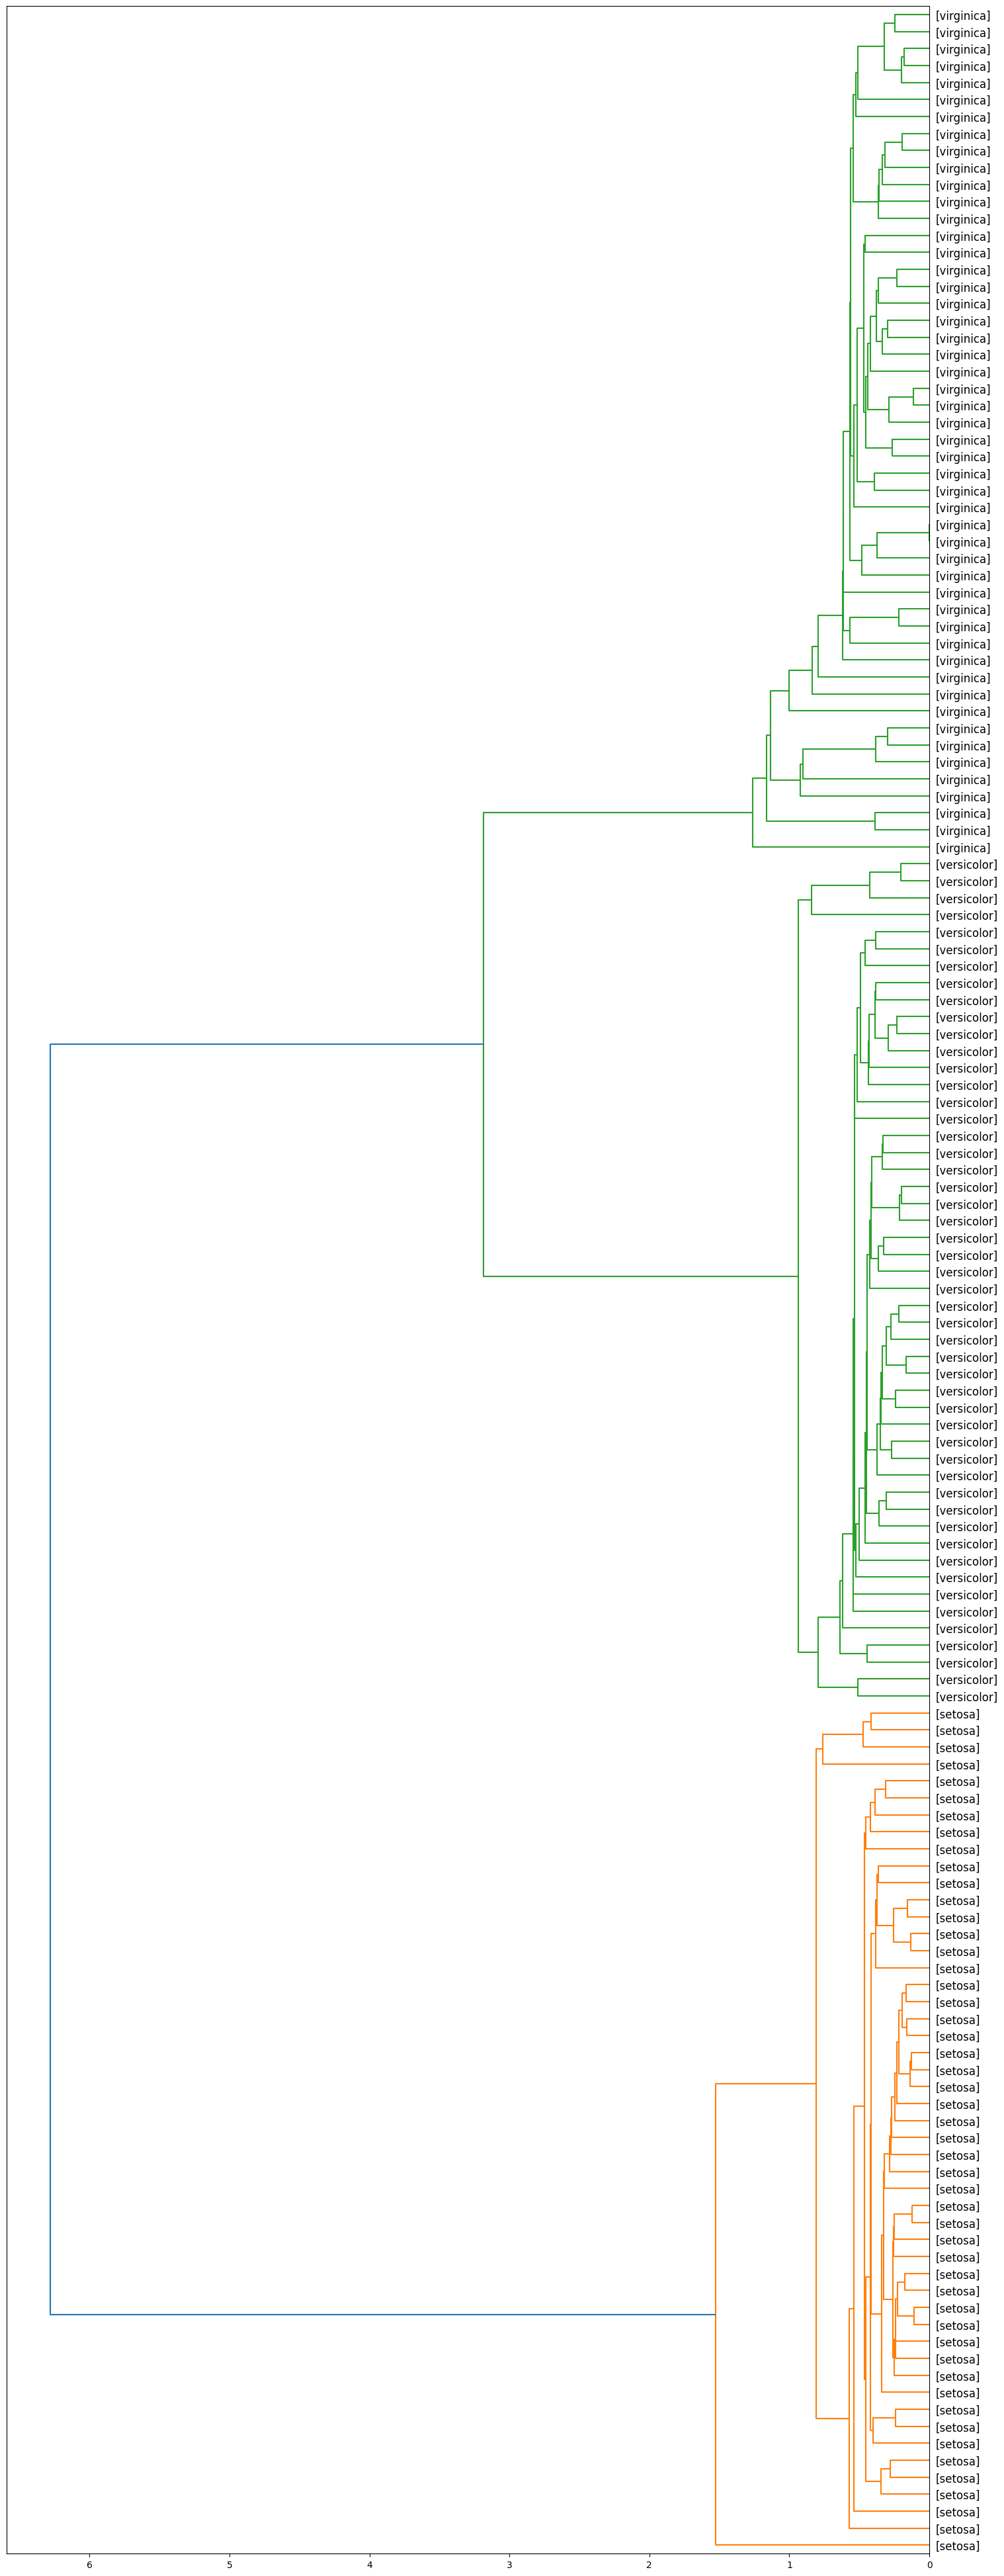

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s]' %(iris.target_names[df['target'][id]])

dendro = hierarchy.dendrogram(sing, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation = 'left')

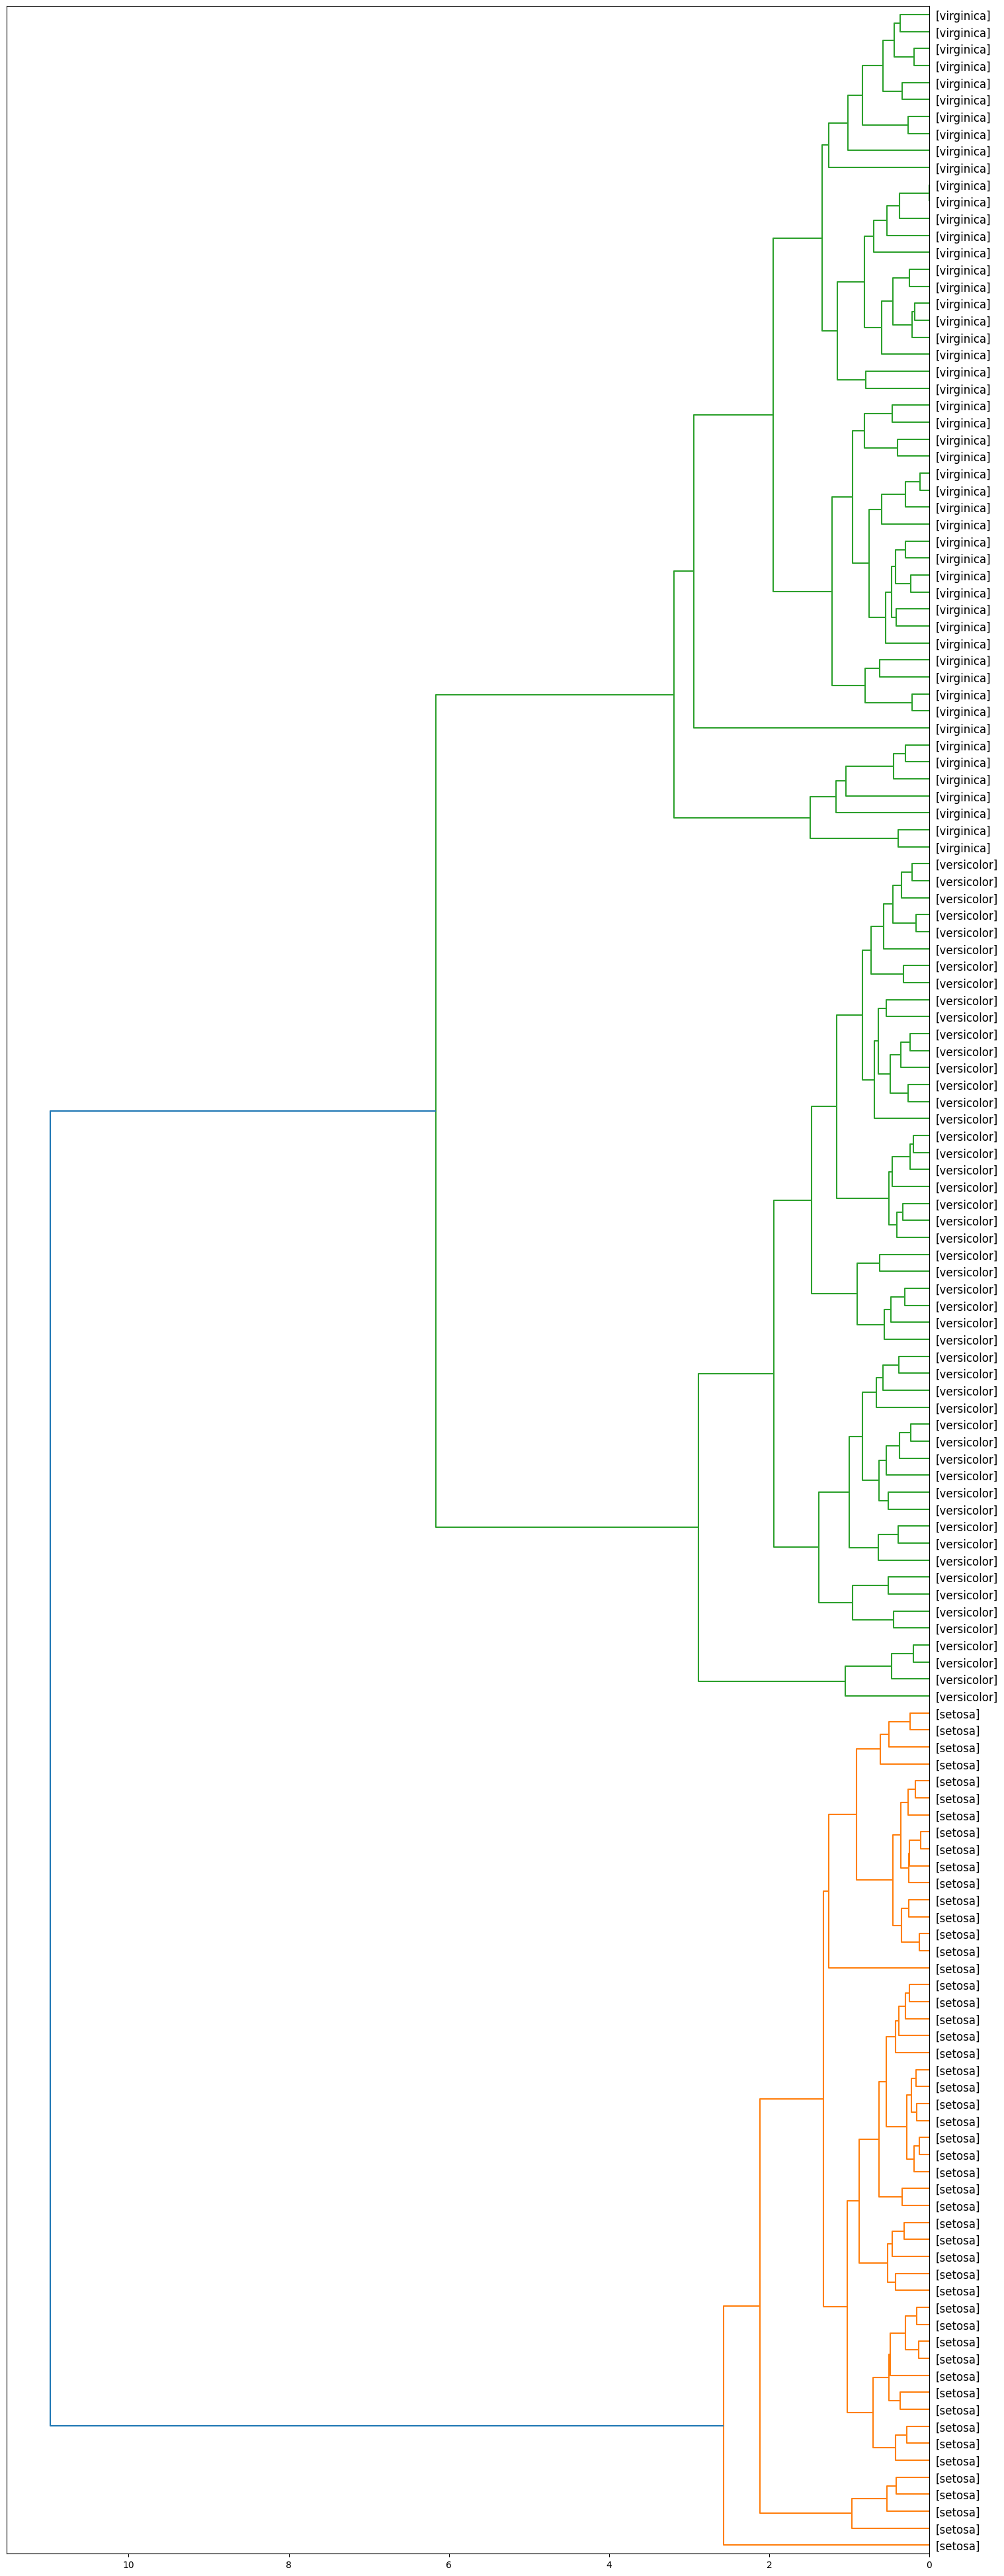

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s]' %(iris.target_names[df['target'][id]])

dendro = hierarchy.dendrogram(avg, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation = 'left')

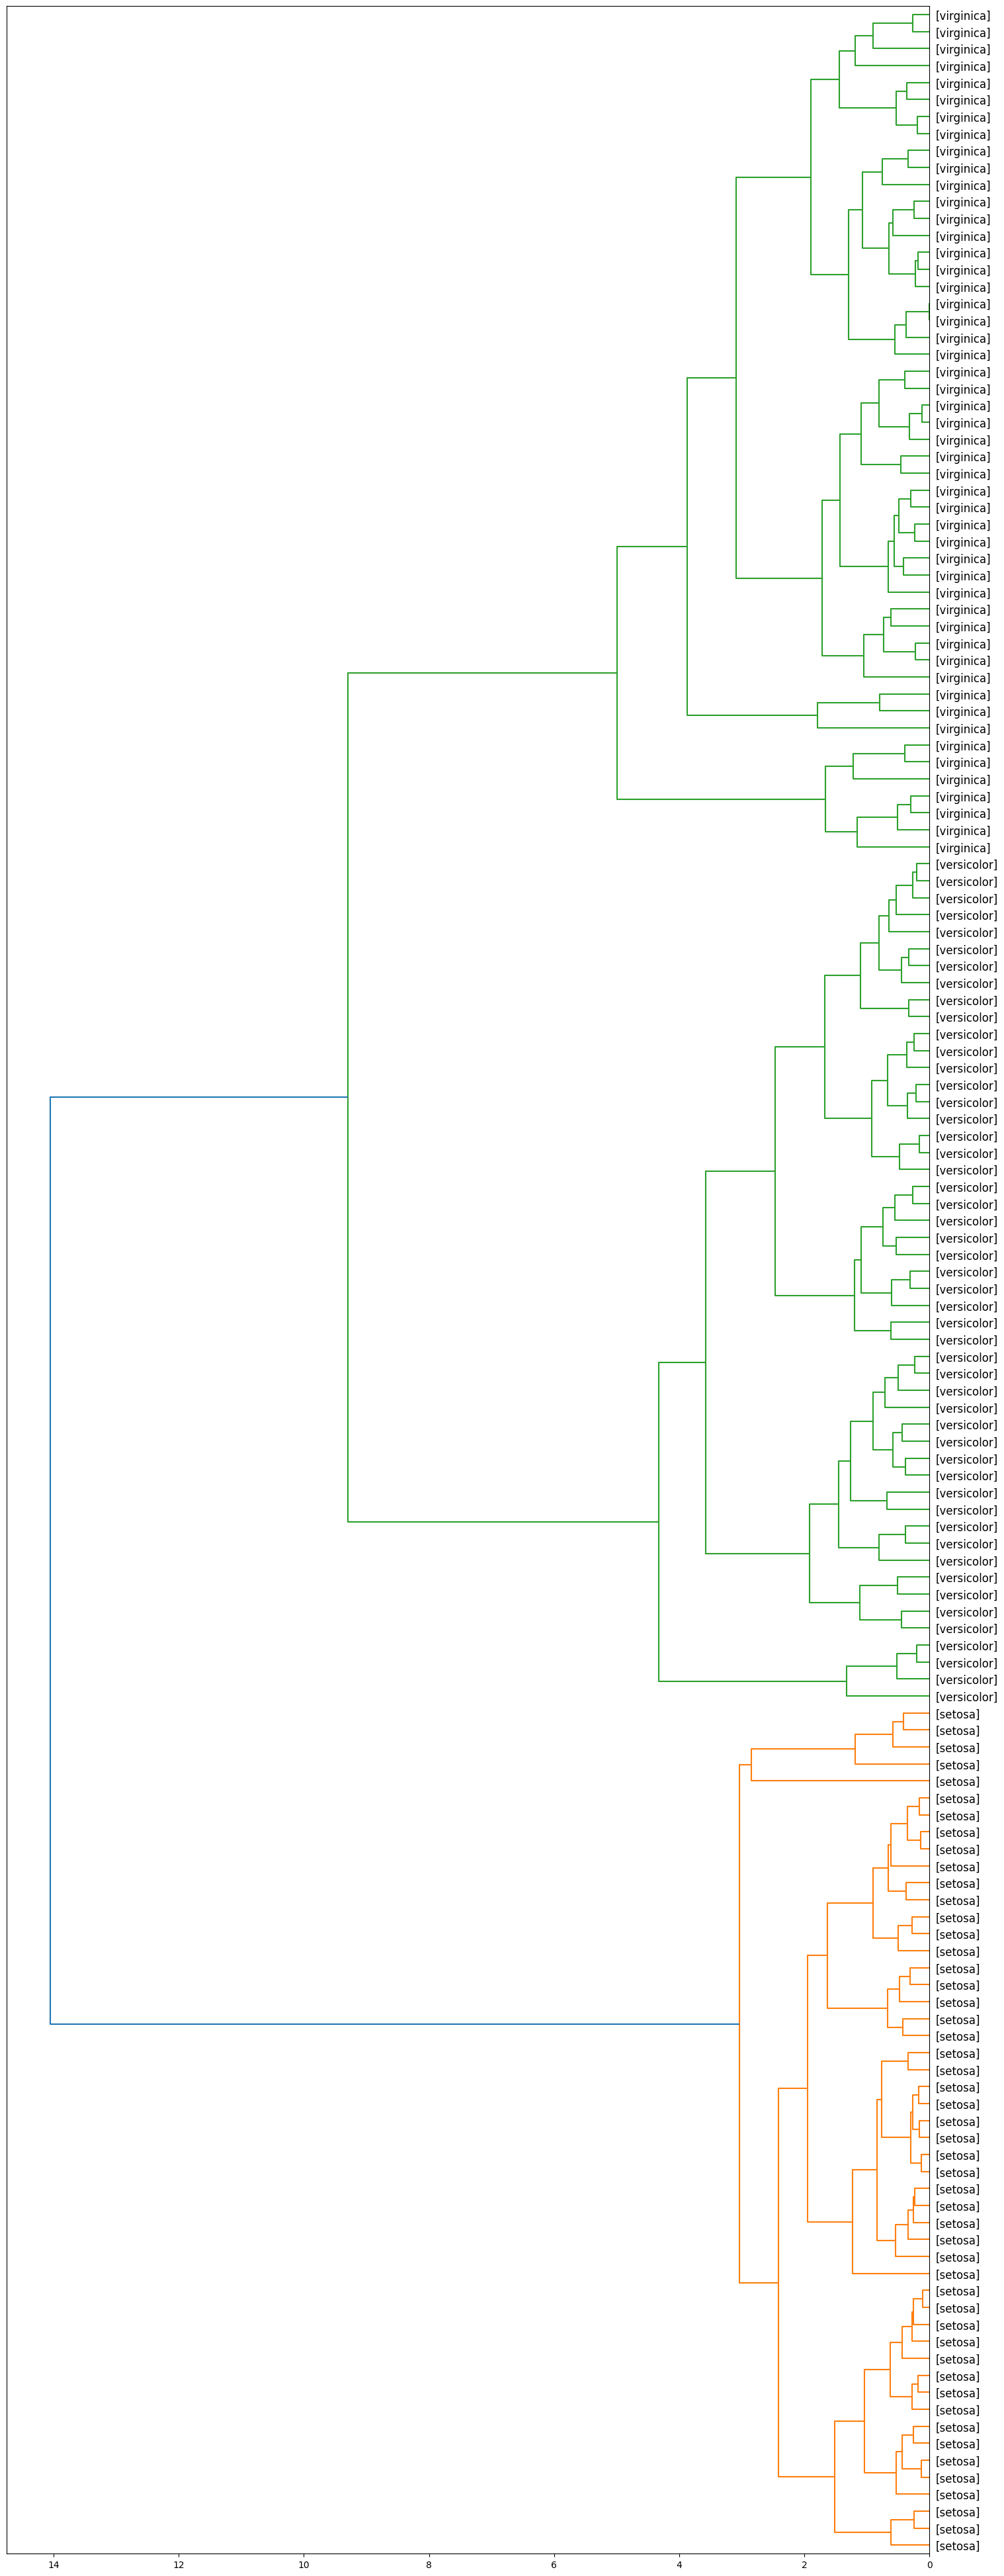

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s]' %(iris.target_names[df['target'][id]])

dendro = hierarchy.dendrogram(com, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation = 'left')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Single Linkage
sing_agglo_clust = AgglomerativeClustering(n_clusters =3,linkage ='single')
sing_agglo_clust.fit(feature_mtx)

# Average Linkage
avg_agglo_clust = AgglomerativeClustering(n_clusters =3,linkage ='average')
avg_agglo_clust.fit(feature_mtx)

# Complete Linkage
com_agglo_clust = AgglomerativeClustering(n_clusters =3,linkage ='complete')
com_agglo_clust.fit(feature_mtx)

print('Single Linkage')
print(sing_agglo_clust.labels_)
print('-'*74)
print('Average Linkage')
print(avg_agglo_clust.labels_)
print('-'*74)
print('Complete Linkage')
print(com_agglo_clust.labels_)

Single Linkage
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
--------------------------------------------------------------------------
Average Linkage
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
--------------------------------------------------------------------------
Complete Linkage
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Dalam langkah ini, kita memanfaatkan fungsi 'AgglomerativeClustering' dari library Scikit-Learn untuk melakukan pengelompokan data dengan menggunakan pendekatan bottom-up. Pertama-tama, kita menghitung jarak antara titik-titik data dan menetapkan jumlah kluster yang diinginkan, yang dalam hal ini adalah 3, dengan menggunakan perintah dan hasil sebagai berikut.

Setelahnya, kita melakukan pengelompokan menggunakan tiga metode linkage, yaitu single linkage, average linkage, dan complete linkage, masing-masing dengan jumlah kluster yang sama, yaitu 3. Hasil dari pengelompokan tersebut kemudian ditampilkan untuk setiap jenis linkage.

Penjelasan ini menyiratkan bahwa pada langkah ini, kita melakukan proses pengelompokan menggunakan pendekatan aglomerasi dengan tiga jenis linkage yang berbeda, dan hasil pengelompokan tersebut ditampilkan.

In [ ]:
sing_df = df.copy(deep=True)
avg_df = df.copy(deep=True)
com_df = df.copy(deep=True)

sing_df['cluster_'] = sing_agglo_clust.labels_
avg_df['cluster_'] = avg_agglo_clust.labels_
com_df['cluster_'] = com_agglo_clust.labels_

In [ ]:
sing_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [ ]:
avg_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [ ]:
com_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [ ]:
sing_df.groupby(['cluster_','target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

In [ ]:
sing_iris = sing_df.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()
sing_iris

<ipython-input-58-f8e87f6346ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sing_iris = sing_df.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


In [ ]:
avg_df.groupby(['cluster_','target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

In [ ]:
avg_iris = avg_df.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()
avg_iris

<ipython-input-60-9c78b836a2d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_iris = avg_df.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


In [ ]:
com_df.groupby(['cluster_','target'])['cluster_'].count()

cluster_  target
0         0         50
1         1         50
          2         20
2         2         30
Name: cluster_, dtype: int64

In [ ]:
com_iris = com_df.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()
com_iris

<ipython-input-62-2213c5d40ad4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  com_iris = com_df.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ target                                                           
0        0                5.006000             3.428           1.462000   
1        1                5.936000             2.770           4.260000   
         2                6.055000             2.740           5.130000   
2        2                6.943333             3.130           5.833333   

                 petal width (cm)  
cluster_ target                    
0        0               0.246000  
1        1               1.326000  
         2               1.815000  
2        2               2.166667

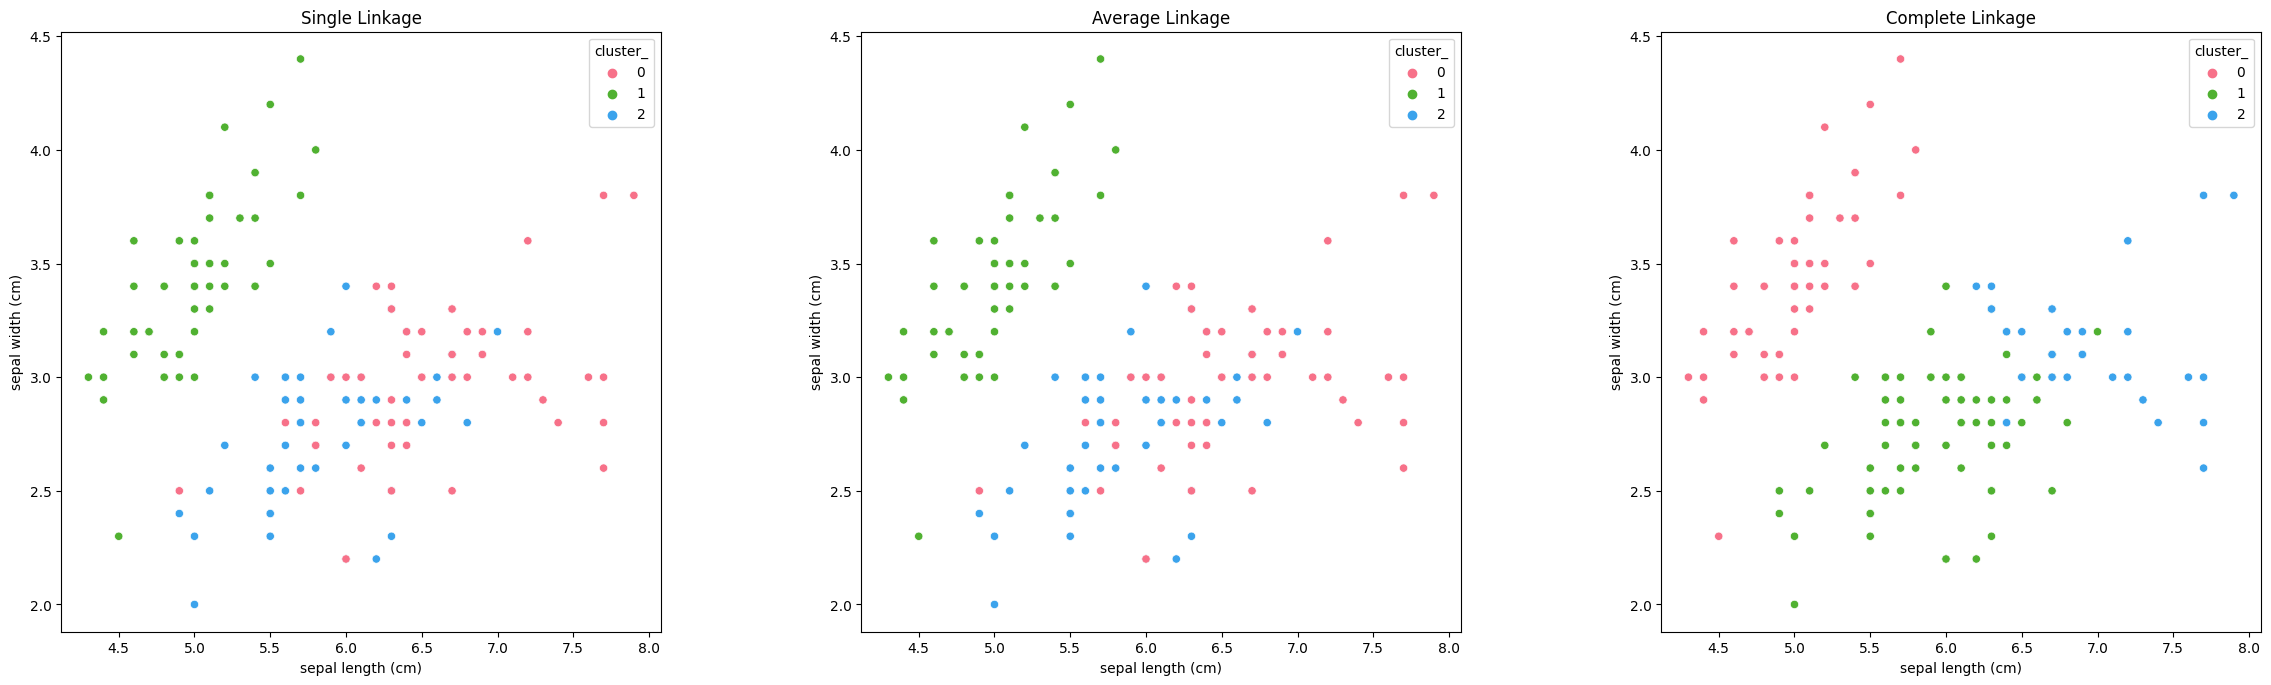

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

rgb_palette = sns.color_palette("husl", n_colors=3)
fig = plt.figure(figsize=(20,10))

# Perbandingan Single, Average, dan Complete Linkage
# Single Linkage Dendogram
ax1 = fig.add_axes([0.1,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='cluster_',data=sing_df,ax=ax1,palette=rgb_palette)
ax1.set_title('Single Linkage')

# Average Linkage Dendogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='cluster_',data=avg_df,ax=ax2,palette=rgb_palette)
ax2.set_title('Average Linkage')

# Complete Linkage Dendogram
ax3 = fig.add_axes([0.9,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='cluster_',data=com_df,ax=ax3,palette=rgb_palette)
ax3.set_title('Complete Linkage')

plt.show()

Pada langkah ini, dilakukan visualisasi dendrogram untuk setiap jenis linkage yang disusun dalam satu baris. Dendrogram kiri menunjukkan hasil dari single linkage, tengah untuk average linkage, dan kanan untuk complete linkage. Pengaturan ini melibatkan fitur sepal length sebagai sumbu X dan sepal width sebagai sumbu Y. Setiap scatter plot menggunakan palet warna RGB dari seaborn untuk membedakan kluster.

Visualisasi ini memberikan perbandingan langsung antara struktur kluster yang dihasilkan oleh tiga jenis linkage yang berbeda. Perintah dan hasil dari proses ini dapat dilihat pada dendrogram yang dibuat.

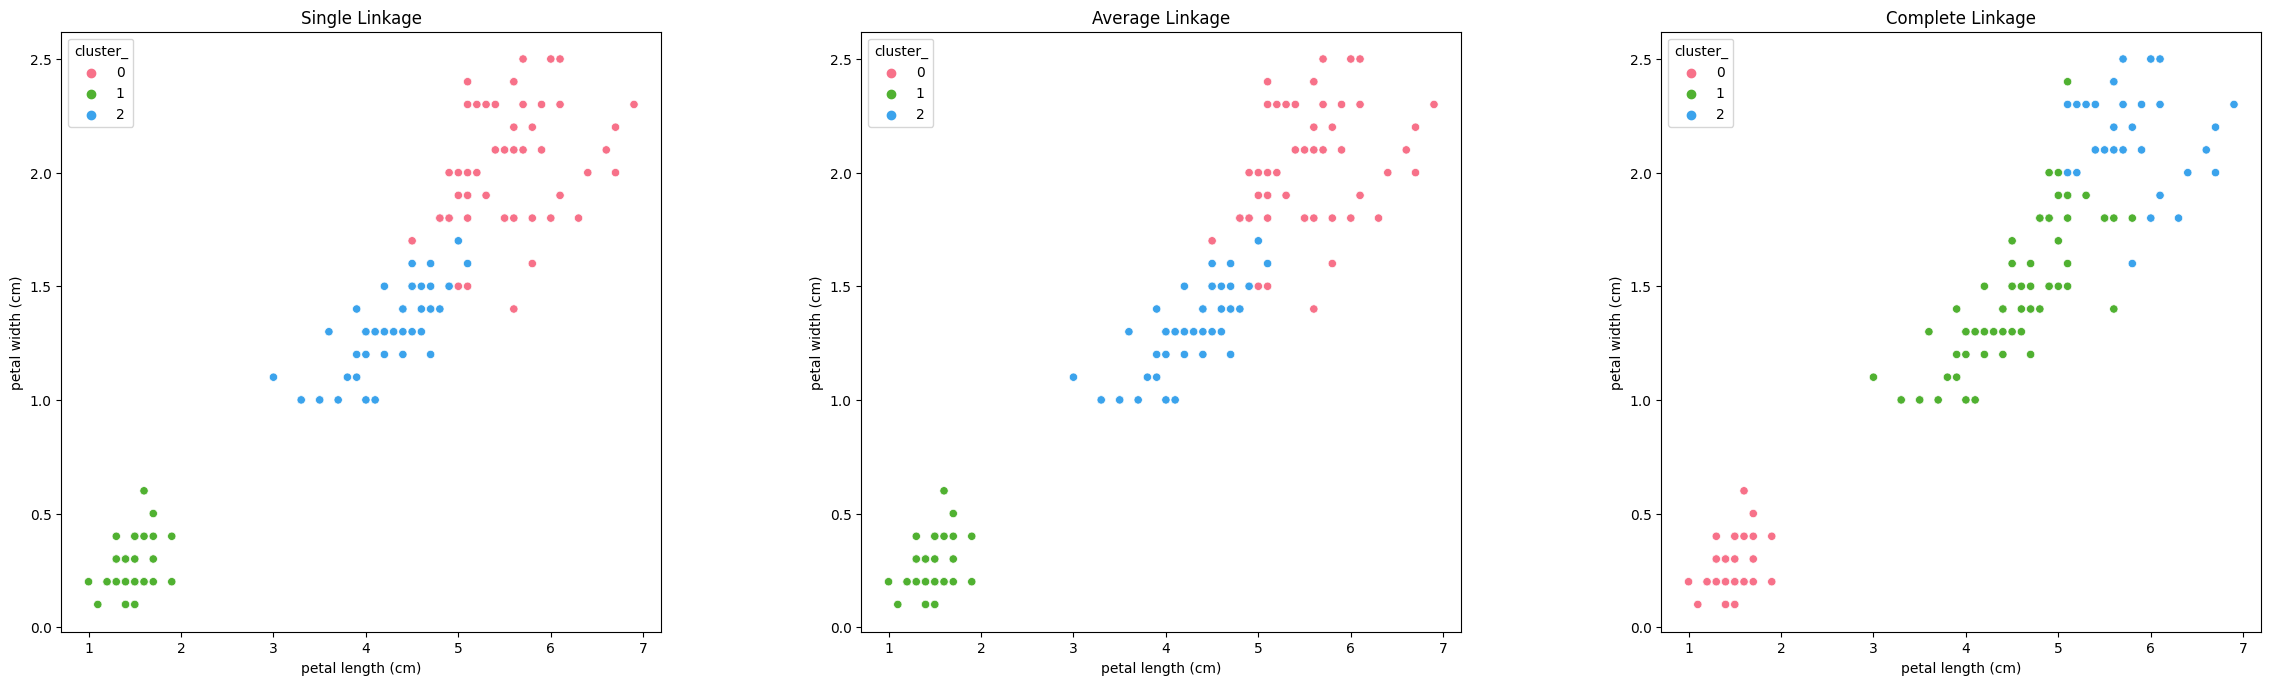

In [ ]:
rgb_palette = sns.color_palette("husl", n_colors=3)
fig = plt.figure(figsize=(20,10))

# Perbandingan Single, Average, dan Complete Linkage
# Single Linkage Dendogram
ax1 = fig.add_axes([0.1,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='cluster_',data=sing_df,ax=ax1,palette=rgb_palette)
ax1.set_title('Single Linkage')

# Average Linkage Dendogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='cluster_',data=avg_df,ax=ax2,palette=rgb_palette)
ax2.set_title('Average Linkage')

# Complete Linkage Dendogram
ax3 = fig.add_axes([0.9,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='cluster_',data=com_df,ax=ax3,palette=rgb_palette)
ax3.set_title('Complete Linkage')

plt.show()

perbedaan:

Ketika menggunakan metode clustering dari Scipy atau Scikit-Learn, hasil clustering yang diperoleh cenderung serupa, meskipun ada perbedaan dalam proses dan kebutuhan komputasi antara keduanya. Secara khusus, Scikit-Learn melibatkan lebih banyak tahapan, termasuk penghitungan jarak, analisis jumlah kasus, dan karakteristik kluster, sehingga menghasilkan dendrogram atau plotting hasil akhir yang lebih jelas.

Dalam clustering dengan metode single dan average linkage, distribusi jumlah data pada setiap kluster sama, yaitu 50 entri data untuk setiap kluster. Namun, pada metode complete linkage, terdapat perbedaan dimana kluster 0 memiliki 50 data, kluster 1 memiliki 70 data, dan kluster 2 memiliki 30 data. Hal ini mengakibatkan perbedaan dalam struktur dendrogram hasil complete linkage dibandingkan dengan single dan average linkage.

Ketika melakukan plotting dendrogram dengan fitur petal length dan petal width, hasil clustering dari metode single dan average linkage menunjukkan struktur yang serupa. Pada struktur ini, data di bagian paling kiri dikategorikan sebagai kluster 1, data di bagian tengah sebagai kluster 2, dan data di bagian paling kanan sebagai kluster 0. Namun, pada metode complete linkage, data di bagian paling kiri termasuk kluster 0, data di bagian tengah termasuk kluster 1, dan data di bagian paling kanan termasuk kluster 2. Perbedaan ini menunjukkan variasi dalam hasil clustering antara metode-metode tersebut.